In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Definitions of MAE, MSE, RMSE

In [2]:
def mae(data, ref):
    mae = 0
    c = 0
    for i in data:
      mae += abs(i-ref)
      c += 1
    return mae / c
    
def mse(data, ref):
    mse = 0
    c = 0
    for i in data:
      mse += (i-ref)**2
      c += 1
    return mse / c

def rmse(data, ref):
    return (mse(data, ref))**(1/2)

## Create random sample data

In [3]:
num_sets = 1000
num_points = 1000

# Generates x sets with y data points each
data = np.random.normal(100, 20, (num_sets, num_points))

## Helper function for creating noisy data and plotting the charts

In [7]:
def evaluate_metrics(data, num_outliers, amplitude_outliers):
    
    # Sample random "num_ouliers" points for each set
    noise = np.random.uniform(0, num_points, (num_sets, num_outliers))
    
    # Lists to keep the metrics for all original sets
    mae_original = []
    mse_original = []
    rmse_original = []
    # Lists to keep the metrics for all noisy sets
    mae_noisy = []
    mse_noisy = []
    rmse_noisy = []
    
    # For each observation set, evaluates all three distances to the mean of the set
    for i in range(data.shape[0]):
        # Recovers the observations
        observations = data[i]
        # Create a noisy verion of the data with the randomly-chosen outliers
        outliers = [int(i) for i in noise[i]]
        observations_noisy = []
        c  = 0
        for x in observations:
            if c in outliers:
                observations_noisy.append(x * amplitude_outliers)
            else:
                observations_noisy.append(x)
            c += 1
            
        # Calculates the mean value of the set.
        # It is important to use the mean of the original set in both cases, to prevent it from shifting and altering the result.
        set_mean = np.mean(observations)
        
        # Evaluate the metrics
        mae_original.append(mae(observations, set_mean))
        mse_original.append(mse(observations, set_mean))
        rmse_original.append(rmse(observations, set_mean))
        mae_noisy.append(mae(observations_noisy, set_mean))
        mse_noisy.append(mse(observations_noisy, set_mean))
        rmse_noisy.append(rmse(observations_noisy, set_mean))
        
    # Plots all
    plt.figure(figsize=(12, 4))
    ax1 = plt.subplot(1, 3, 1)
    ax2 = plt.subplot(1, 3, 2)
    ax3 = plt.subplot(1, 3, 3)
    sns.histplot(mae_original, ax = ax1, color = 'maroon', kde = True, fill = False)
    sns.histplot(mae_noisy, ax = ax1, color = 'r', kde = True)
    sns.histplot(rmse_original, ax = ax2, color = 'darkgreen', kde = True, fill = False)
    sns.histplot(rmse_noisy, ax = ax2, color = 'g', kde = True)
    sns.histplot(mse_original, ax = ax3, color = 'darkblue', kde = True, fill = False)
    sns.histplot(mse_noisy, ax = ax3, color = 'b', kde = True)
    ax1.legend(["Original", "Noisy"], loc = 'lower right')
    ax2.legend(["Original", "Noisy"], loc = 'lower right')
    ax3.legend(["Original", "Noisy"], loc = 'lower right')
    ax1.set_title("MAE")
    ax2.set_title("RMSE")
    ax3.set_title("MSE")
    plt.tight_layout()

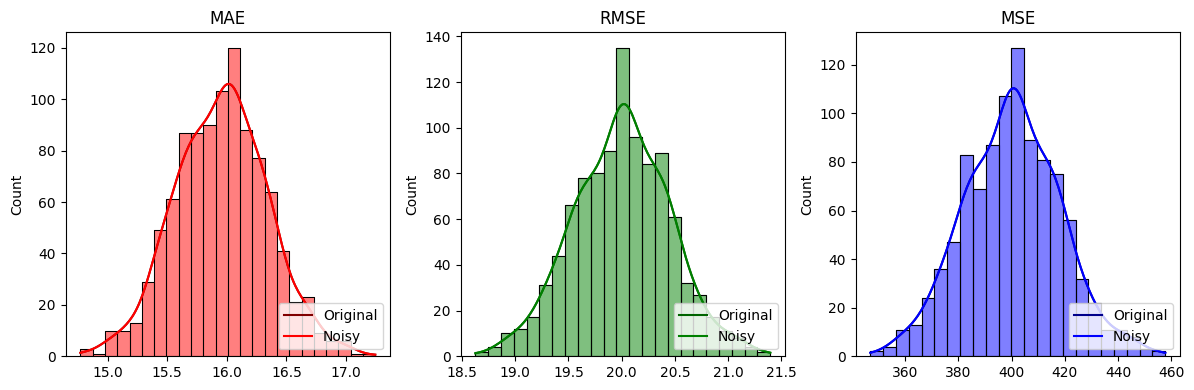

In [8]:
evaluate_metrics(data, num_outliers=0, amplitude_outliers=1)

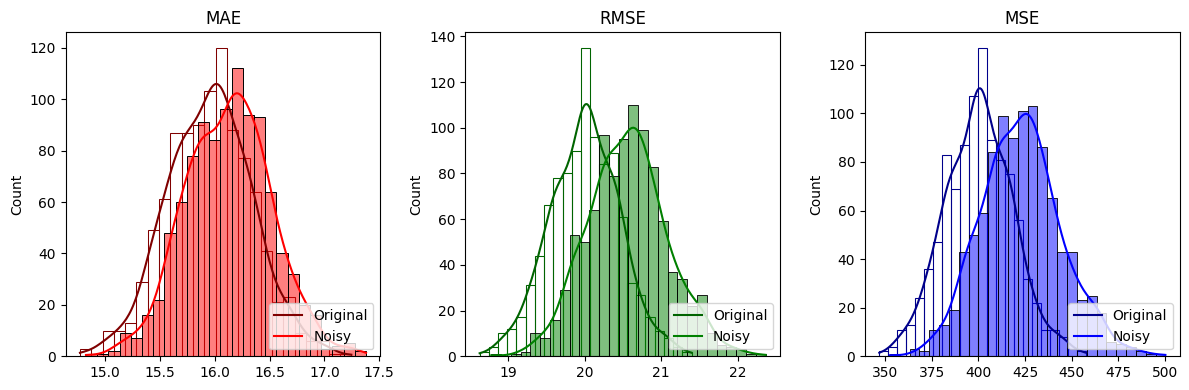

In [9]:
evaluate_metrics(data, num_outliers=2, amplitude_outliers=2)

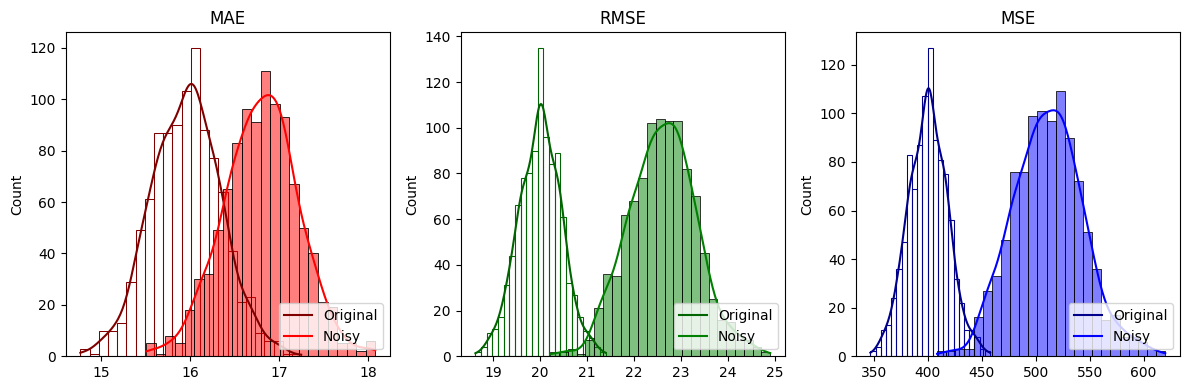

In [10]:
evaluate_metrics(data, num_outliers=10, amplitude_outliers=2)

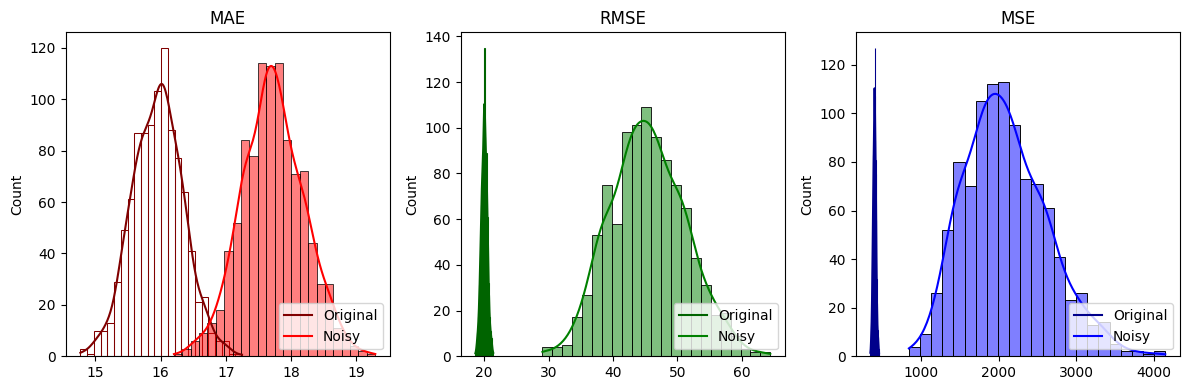

In [11]:
evaluate_metrics(data, num_outliers=2, amplitude_outliers=10)

 This code primarily focuses on evaluating three metrics (Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error) on a set of generated random data and its noisy version. It also plots the distributions of these metrics for both the original and noisy data. 

### Importing Libraries
```python
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
```
- **numpy** is used for numerical operations, particularly for working with arrays.
- **seaborn** and **matplotlib** are used for data visualization.

### Function Definitions
1. **Mean Absolute Error (MAE)**
```python
def mae(data, ref):
    mae = 0
    c = 0
    for i in data:
        mae += abs(i - ref)
        c += 1
    return mae / c
```
- This function calculates the mean absolute error between a dataset (`data`) and a reference value (`ref`). It sums up the absolute differences and divides by the number of data points.

2. **Mean Squared Error (MSE)**
```python
def mse(data, ref):
    mse = 0
    c = 0
    for i in data:
        mse += (i - ref) ** 2
        c += 1
    return mse / c
```
- This function calculates the mean squared error between a dataset and a reference value. It squares the differences before summing and averages them.

3. **Root Mean Squared Error (RMSE)**
```python
def rmse(data, ref):
    return (mse(data, ref)) ** (1/2)
```
- This function computes the root mean squared error by taking the square root of the mean squared error.

### Data Generation
```python
num_sets = 1000
num_points = 1000
data = np.random.normal(100, 20, (num_sets, num_points))
```
- `num_sets` and `num_points` define how many sets of data and how many points in each set are generated.
- `data` is generated from a normal distribution with a mean of 100 and a standard deviation of 20.

### Evaluate Metrics Function
```python
def evaluate_metrics(data, num_outliers, amplitude_outliers):
```
- This function evaluates the metrics for both the original and noisy versions of the data.

#### Inside the Function:
- **Generate Outliers:**
```python
noise = np.random.uniform(0, num_points, (num_sets, num_outliers))
```
- Generates random indices for outliers in each data set.

- **Metrics Lists:**
```python
mae_original = []
mse_original = []
rmse_original = []
mae_noisy = []
mse_noisy = []
rmse_noisy = []
```
- Initializes lists to store the metrics for original and noisy data.

- **Loop through Each Set:**
```python
for i in range(data.shape[0]):
```
- Iterates over each data set.

- **Outlier Handling:**
```python
outliers = [int(i) for i in noise[i]]
observations_noisy = []
for x in observations:
    if c in outliers:
        observations_noisy.append(x * amplitude_outliers)
    else:
        observations_noisy.append(x)
    c += 1
```
- Creates a noisy version of the data by multiplying selected outlier points by `amplitude_outliers`.

- **Calculate Metrics:**
```python
set_mean = np.mean(observations)
mae_original.append(mae(observations, set_mean))
mse_original.append(mse(observations, set_mean))
rmse_original.append(rmse(observations, set_mean))
mae_noisy.append(mae(observations_noisy, set_mean))
mse_noisy.append(mse(observations_noisy, set_mean))
rmse_noisy.append(rmse(observations_noisy, set_mean))
```
- Calculates the mean and then evaluates the metrics for both the original and noisy data.

### Plotting
```python
plt.figure(figsize=(12, 4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
sns.histplot(mae_original, ax=ax1, color='maroon', kde=True, fill=False)
...
plt.tight_layout()
```
- Creates histograms for MAE, RMSE, and MSE of both original and noisy data, allowing visual comparison.

### Function Calls
```python
evaluate_metrics(data, num_outliers=0, amplitude_outliers=1)
evaluate_metrics(data, num_outliers=2, amplitude_outliers=2)
evaluate_metrics(data, num_outliers=10, amplitude_outliers=2)
```
- Calls the `evaluate_metrics` function with different numbers of outliers to observe how noise affects the error metrics.

### Summary
This code simulates the effect of adding noise (outliers) to a set of normally distributed data and evaluates how this noise affects the accuracy metrics (MAE, MSE, RMSE) using visual plots. If you have any specific parts you want more clarity on, feel free to ask!

Of course! Let’s go step by step.  

---

### **What is this code trying to do?**  
The code is testing **how errors change** when we add some extreme values (outliers) to a dataset.  

---

### **Step 1: Create a Dataset**  
We generate **1000 sets of 1000 numbers** using:  
```python
data = np.random.normal(100, 20, (num_sets, num_points))
```
- Each set has **1000 numbers** that follow a normal distribution.  
- The numbers are **centered around 100** with some variation (standard deviation = 20).  
- This is like having test scores of 1000 students where most scores are around **100 ± 20**.  

---

### **Step 2: Define Error Metrics**  
The code defines three functions to measure errors:  

1. **Mean Absolute Error (MAE)**  
   - Measures the **average absolute difference** between data points and the mean.  
   - Formula:  
     \[
     MAE = \frac{1}{N} \sum |x - mean|
     \]

2. **Mean Squared Error (MSE)**  
   - Measures the **average squared difference** between data points and the mean.  
   - Formula:  
     \[
     MSE = \frac{1}{N} \sum (x - mean)^2
     \]
   - It **amplifies large differences** more than MAE.

3. **Root Mean Squared Error (RMSE)**  
   - Just the **square root of MSE**.  
   - Formula:  
     \[
     RMSE = \sqrt{MSE}
     \]
   - This makes it easier to compare with actual data values.

---

### **Step 3: Add Outliers**  
The function `evaluate_metrics()` does the following:  

1. It **randomly picks** `num_outliers` data points from each set.  
2. These selected points are **multiplied by `amplitude_outliers`** to create extreme values.  

#### **Example:**  
- Let’s say we have a dataset:  
  ```
  [100, 98, 105, 102, 99, 97, 101]
  ```
- If we choose **2 outliers** and set `amplitude_outliers = 2`, we might change:  
  ```
  [100, 98, **210**, 102, 99, **194**, 101]
  ```
  - The values **105 → 210** and **97 → 194** are now outliers.

---

### **Step 4: Measure the Effect of Outliers on Errors**  
- The function calculates MAE, MSE, and RMSE **before and after** adding outliers.  
- It then **plots the results** to show how much the errors changed.

---

### **Why Are We Doing This?**  
This helps us understand:  
✅ **Which error metric is most affected by outliers?**  
✅ **How much do outliers impact data analysis?**  

In general:  
- **MAE** is **less affected** by outliers.  
- **MSE** and **RMSE** are **more sensitive** because squaring makes big errors much larger.  

---

### **Final Summary**  
📌 We create a dataset.  
📌 We add **random extreme values** (outliers).  
📌 We check how errors **change before and after** adding outliers.  
📌 We visualize the impact of outliers on MAE, MSE, and RMSE.  

💡 This is useful in **data science and statistics** to choose the right error metric for analysis!  

---

Now, does it make sense? 😊